In [1]:
## importing libraries to carry out the analysis

import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('excel_data.xlsx')
df = df.drop('Respondents',axis=1)
print(df.shape)
df.head()

(50, 15)


,Cimas Medical Aid has higher profitability as compared to its rival firms.,Cimas medical Aid has positive cashflows,Cimas Medical aid monthly collections (%) are above those of rivals,Customer are satisfied with medical packages offered by Cimas Medical Aid?,Cimas Medical Aid invest in customer needs and demands?,Cimas medical aid has high commitment over service quality.,Cimas Medical aid is responsive to customers complaints,Cimas’s average time for introducing a new product to the market is low?,"The Society has adequate technology, and its adaptation is excellent.",Cimas medical Aid internal processes suits the needs of customers.,Cimas Medical aid operates at an advantageous position for product and process innovation,\nCimas medical aid has suitable performance in employee’s education.,\nCimas Medical employees are satisfied with the companies’ environment.,Cimas Medical Aid employees are promoting in their job environment.,At Cimas continuous education has leaded to high levels of experience and innovation.
0,Strongly disagree,Neutral,Strongly agree,Agree,Strongly agree,Strongly disagree,Agree,Strongly Disagree,Strongly agree,Strongly disagree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly Agree
1,Strongly agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Agree,Neutral,Agree,Strongly agree,Strongly agree,Agree,Neutral,Strongly Agree
2,Agree,Agree,Agree,Neutral,Strongly agree,Strongly disagree,Agree,Neutral,Agree,Agree,Strongly agree,Agree,Neutral,Agree,Agree
3,Agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neutral,Strongly agree,Agree,Agree,Agree,Agree,Agree,Strongly Agree
4,Neutral,Agree,Neutral,Agree,Strongly Disagree,Disagree,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Neutral,Neutral,Agree


In [3]:
# Checking for missing values in the dataset

def missing_value_table(data):
    missing_value = data.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * data.isna().sum()//len(data)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("lightblue", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return
  
missing_value_table(df)

,Missing Values,% Value
Cimas’s average time for introducing a new product to the market is low?,9,18
Cimas medical Aid has positive cashflows,8,16
Cimas Medical Aid employees are promoting in their job environment.,7,14
Customer are satisfied with medical packages offered by Cimas Medical Aid?,6,12
Cimas Medical aid is responsive to customers complaints,6,12
Cimas Medical employees are satisfied with the companies’ environment.,6,12
Cimas medical aid has high commitment over service quality.,5,10
Cimas Medical aid operates at an advantageous position for product and process innovation,5,10
Cimas medical aid has suitable performance in employee’s education.,5,10
Cimas Medical Aid invest in customer needs and demands?,4,8


In [4]:
# Create a dictionary that maps each old text value to the new encoded value
encoding_dict = {'Strongly Agree':5,'Strongly agree': 5,'Agree': 4, 'Neutral': 3,'Disagree':2,'Strongly disagree':1,'Strongly Disagree':1}

# Encode the column using the replace() method
df = df.replace(encoding_dict)
df

,Cimas Medical Aid has higher profitability as compared to its rival firms.,Cimas medical Aid has positive cashflows,Cimas Medical aid monthly collections (%) are above those of rivals,Customer are satisfied with medical packages offered by Cimas Medical Aid?,Cimas Medical Aid invest in customer needs and demands?,Cimas medical aid has high commitment over service quality.,Cimas Medical aid is responsive to customers complaints,Cimas’s average time for introducing a new product to the market is low?,"The Society has adequate technology, and its adaptation is excellent.",Cimas medical Aid internal processes suits the needs of customers.,Cimas Medical aid operates at an advantageous position for product and process innovation,\nCimas medical aid has suitable performance in employee’s education.,\nCimas Medical employees are satisfied with the companies’ environment.,Cimas Medical Aid employees are promoting in their job environment.,At Cimas continuous education has leaded to high levels of experience and innovation.
0,1,3.0,5,4.0,5.0,1.0,4.0,1.0,5.0,1.0,5.0,5.0,4.0,5.0,5.0
1,5,5.0,5,4.0,5.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.0,3.0,5.0
2,4,4.0,4,3.0,5.0,1.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,4.0,4.0
3,4,4.0,5,5.0,5.0,5.0,5.0,3.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0
4,3,4.0,3,4.0,1.0,2.0,5.0,4.0,5.0,4.0,4.0,4.0,3.0,3.0,4.0
5,1,5.0,5,1.0,5.0,1.0,1.0,3.0,1.0,1.0,5.0,4.0,4.0,3.0,4.0
6,4,3.0,3,5.0,5.0,5.0,4.0,2.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0
7,3,5.0,4,3.0,3.0,2.0,NaN,4.0,3.0,4.0,3.0,2.0,4.0,NaN,3.0
8,3,3.0,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
9,2,4.0,3,3.0,2.0,1.0,3.0,3.0,3.0,4.0,3.0,4.0,2.0,2.0,NaN


In [5]:
df = df.replace(np.nan, 3)
df.head()

,Cimas Medical Aid has higher profitability as compared to its rival firms.,Cimas medical Aid has positive cashflows,Cimas Medical aid monthly collections (%) are above those of rivals,Customer are satisfied with medical packages offered by Cimas Medical Aid?,Cimas Medical Aid invest in customer needs and demands?,Cimas medical aid has high commitment over service quality.,Cimas Medical aid is responsive to customers complaints,Cimas’s average time for introducing a new product to the market is low?,"The Society has adequate technology, and its adaptation is excellent.",Cimas medical Aid internal processes suits the needs of customers.,Cimas Medical aid operates at an advantageous position for product and process innovation,\nCimas medical aid has suitable performance in employee’s education.,\nCimas Medical employees are satisfied with the companies’ environment.,Cimas Medical Aid employees are promoting in their job environment.,At Cimas continuous education has leaded to high levels of experience and innovation.
0,1,3.0,5,4.0,5.0,1.0,4.0,1.0,5.0,1.0,5.0,5.0,4.0,5.0,5.0
1,5,5.0,5,4.0,5.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.0,3.0,5.0
2,4,4.0,4,3.0,5.0,1.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,4.0,4.0
3,4,4.0,5,5.0,5.0,5.0,5.0,3.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0
4,3,4.0,3,4.0,1.0,2.0,5.0,4.0,5.0,4.0,4.0,4.0,3.0,3.0,4.0


In [6]:
df.tail()

,Cimas Medical Aid has higher profitability as compared to its rival firms.,Cimas medical Aid has positive cashflows,Cimas Medical aid monthly collections (%) are above those of rivals,Customer are satisfied with medical packages offered by Cimas Medical Aid?,Cimas Medical Aid invest in customer needs and demands?,Cimas medical aid has high commitment over service quality.,Cimas Medical aid is responsive to customers complaints,Cimas’s average time for introducing a new product to the market is low?,"The Society has adequate technology, and its adaptation is excellent.",Cimas medical Aid internal processes suits the needs of customers.,Cimas Medical aid operates at an advantageous position for product and process innovation,\nCimas medical aid has suitable performance in employee’s education.,\nCimas Medical employees are satisfied with the companies’ environment.,Cimas Medical Aid employees are promoting in their job environment.,At Cimas continuous education has leaded to high levels of experience and innovation.
45,3,3.0,3,2.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0
46,2,1.0,2,3.0,4.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,4.0,5.0
47,4,4.0,4,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0
48,5,1.0,4,4.0,4.0,5.0,1.0,4.0,3.0,5.0,4.0,4.0,4.0,4.0,5.0
49,4,4.0,4,4.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0


In [7]:
df.columns

Index(['Cimas Medical Aid has higher profitability as compared to its rival firms.',
       'Cimas medical Aid has positive cashflows',
       'Cimas Medical aid monthly collections (%) are above those of rivals',
       'Customer are satisfied with medical packages offered by Cimas Medical Aid?',
       'Cimas Medical Aid invest in customer needs and demands?',
       'Cimas medical aid has high commitment over service quality.',
       'Cimas Medical aid is responsive to customers complaints',
       'Cimas’s average time for introducing a new product to the market is low?',
       'The Society has adequate technology, and its adaptation is excellent.',
       'Cimas medical Aid internal processes suits the needs of customers.',
       'Cimas Medical aid operates at an advantageous position for product and process innovation',
       '\nCimas medical aid has suitable performance in employee’s education.',
       '\nCimas Medical employees are satisfied with the companies’ environment

In [8]:
main_col = ['Financial Perspective',
'Customer Perspective',
'Learning and Growth',
'Internal Processes',
'Organizational Perfomance']

In [9]:
df.head()

,Cimas Medical Aid has higher profitability as compared to its rival firms.,Cimas medical Aid has positive cashflows,Cimas Medical aid monthly collections (%) are above those of rivals,Customer are satisfied with medical packages offered by Cimas Medical Aid?,Cimas Medical Aid invest in customer needs and demands?,Cimas medical aid has high commitment over service quality.,Cimas Medical aid is responsive to customers complaints,Cimas’s average time for introducing a new product to the market is low?,"The Society has adequate technology, and its adaptation is excellent.",Cimas medical Aid internal processes suits the needs of customers.,Cimas Medical aid operates at an advantageous position for product and process innovation,\nCimas medical aid has suitable performance in employee’s education.,\nCimas Medical employees are satisfied with the companies’ environment.,Cimas Medical Aid employees are promoting in their job environment.,At Cimas continuous education has leaded to high levels of experience and innovation.
0,1,3.0,5,4.0,5.0,1.0,4.0,1.0,5.0,1.0,5.0,5.0,4.0,5.0,5.0
1,5,5.0,5,4.0,5.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.0,3.0,5.0
2,4,4.0,4,3.0,5.0,1.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,4.0,4.0
3,4,4.0,5,5.0,5.0,5.0,5.0,3.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0
4,3,4.0,3,4.0,1.0,2.0,5.0,4.0,5.0,4.0,4.0,4.0,3.0,3.0,4.0


In [10]:
df['Financial Perspective'] = df.iloc[:,[0,1,2,3]].mean(axis=1)
df['Customer Perspective'] = df.iloc[:,[4,5,6,7]].mean(axis=1)
df['Learning and Growth'] = df.iloc[:,[8,9,10,11]].mean(axis=1)
df['Internal Processes'] = df.iloc[:,[12,13,14]].mean(axis=1)
df['Organizational Perfomance'] = (df['Financial Perspective'] + df['Customer Perspective'] + df['Learning and Growth'] + df['Internal Processes'])
df = df[['Financial Perspective','Customer Perspective','Learning and Growth','Internal Processes','Organizational Perfomance']]
df['Financial Perspective'] = df['Financial Perspective'].round(0)
df['Customer Perspective'] = df['Customer Perspective'].round(0)
df['Learning and Growth'] = df['Learning and Growth'].round(0)
df['Internal Processes'] = df['Internal Processes'].round(0)
data = df
data.head()

,Financial Perspective,Customer Perspective,Learning and Growth,Internal Processes,Organizational Perfomance
0,3.0,3.0,4.0,5.0,14.666667
1,5.0,5.0,4.0,4.0,17.750000
2,4.0,3.0,4.0,4.0,14.916667
3,4.0,4.0,4.0,4.0,17.583333
4,4.0,3.0,4.0,3.0,14.083333


In [11]:
# Checking for missing values in the dataset

def missing_value_table(data):
    missing_value = data.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * data.isna().sum()//len(data)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("lightblue", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return
  
missing_value_table(data)

,Missing Values,% Value
Financial Perspective,0,0
Customer Perspective,0,0
Learning and Growth,0,0
Internal Processes,0,0
Organizational Perfomance,0,0


In [12]:
# checking for unique values in each column in the dataset

def unique_value(data_set, column_name):
    return data_set[column_name].nunique()

print("Number of the Unique Values:")
print(unique_value(data,list(data.columns)))

Number of the Unique Values:
Financial Perspective         4
Customer Perspective          4
Learning and Growth           4
Internal Processes            4
Organizational Perfomance    39
dtype: int64


In [13]:
data_copy = data.copy(deep=True)

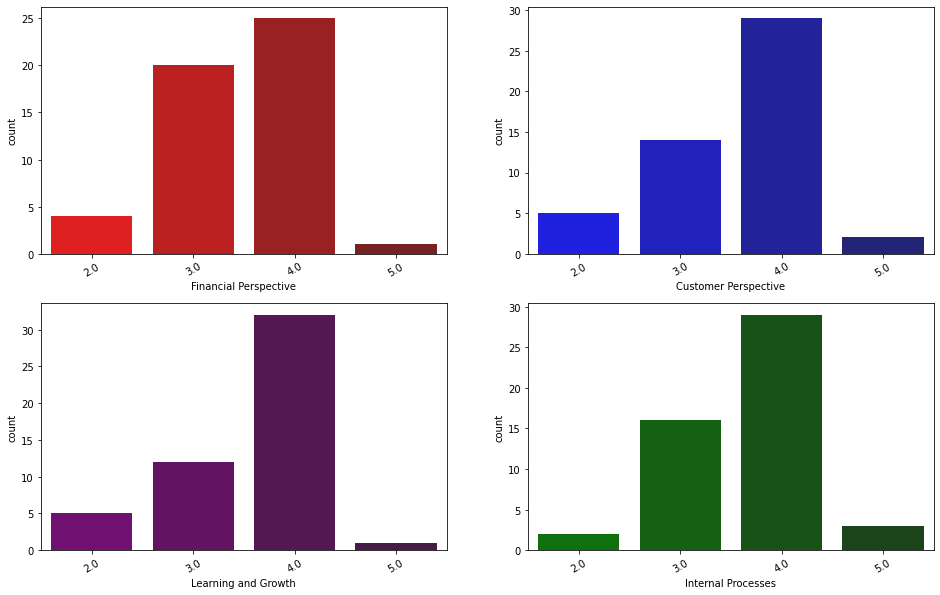

In [14]:
# Descriptive analytics for the data distribution

fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(16,10))
cat_list=['Financial Perspective', 'Customer Perspective', 'Learning and Growth',
       'Internal Processes']
palette=["red","blue","purple","green"]
count=0
for i in range(2):
    for j in range(2):
        sns.countplot(data[cat_list[count]],ax=ax[i][j],palette=sns.dark_palette(palette[count],reverse=True))
        ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(),rotation=30)
        count+=1

<Axes: >

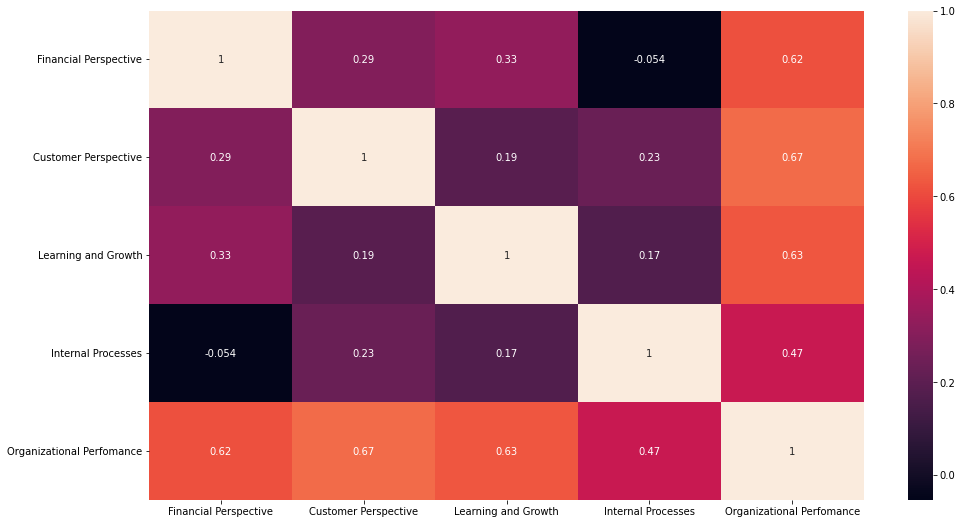

In [15]:
## spearman correlation matrix in the form of a heatmap for better visualisation

plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),annot=True)

In [23]:
# ## Descriptive analytics using line graphs

# plt.figure(figsize=(16,9))

# sns.set_style("darkgrid")

# counts1 = data["Financial Perspective"].value_counts()
# counts2 = data["Customer Perspective"].value_counts()
# counts3 = data["Learning and Growth"].value_counts()
# counts4 = data["Internal Processes"].value_counts()
# counts5 = data["Organizational Perfomance"].value_counts()

# sns.lineplot(x=counts1.index, y=counts1.values, color="blue", label="Financial Perspective")
# sns.lineplot(x=counts2.index, y=counts2.values, color="green", label="Customer Perspective")
# sns.lineplot(x=counts3.index, y=counts3.values, color="red", label="Learning and Growth")
# sns.lineplot(x=counts4.index, y=counts4.values, color="purple", label="Internal Processes")
# sns.lineplot(x=counts5.index, y=counts5.values, color="orange", label="Organizational Perfomance")

# plt.title("dependent and independent variables")

# plt.legend()
# plt.show()

In [17]:
X = data[['Financial Perspective','Customer Perspective','Learning and Growth','Internal Processes']]
y = data['Organizational Perfomance']

In [18]:
## regression analysis (creating a multiple linear regression model and calculating values for hypothesis testing)

X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()
print(model2.summary())

                                OLS Regression Results                               
Dep. Variable:     Organizational Perfomance   R-squared:                       0.901
Model:                                   OLS   Adj. R-squared:                  0.893
Method:                        Least Squares   F-statistic:                     102.8
Date:                       Wed, 31 May 2023   Prob (F-statistic):           4.96e-22
Time:                               11:30:10   Log-Likelihood:                -37.779
No. Observations:                         50   AIC:                             85.56
Df Residuals:                             45   BIC:                             95.12
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [19]:
## Ridge regression to support the above model

import scipy.stats as ss
from collections import Counter
import math 
from matplotlib import pyplot as plt
from scipy import stats
from IPython.display import display, Markdown, Latex
from sklearn.preprocessing import StandardScaler 
from statsmodels.tsa.stattools import adfuller

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

ridge_model = Ridge(alpha=1)

ridge_model.fit(X, y)

y_pred = ridge_model.predict(X)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
r2_adj = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
f_statistic = (r2 / X.shape[1]) / ((1 - r2) / (len(y) - X.shape[1] - 1))
p_value = 1 - stats.f.cdf(f_statistic, X.shape[1], len(y) - X.shape[1] - 1)

print('MSE:', mse)
print('RMSE:', rmse)
print("Mean absolute error:", mae)
print('R-squared:', r2)
print('R-squared adjusted:', r2_adj)
print('F-statistic:', f_statistic)
print('p-value:', p_value)

MSE: 0.2670343928543329
RMSE: 0.5167537061834515
Mean absolute error: 0.3514468775376296
R-squared: 0.9007230202384945
R-squared adjusted: 0.8894415452655962
F-statistic: 79.8408915857469
p-value: 1.1102230246251565e-16


In [20]:
# Chi square tests for the dataset

from scipy.stats import chi2_contingency

table = pd.crosstab(y, [
    data["Financial Perspective"],
    data["Customer Perspective"],
    data["Learning and Growth"],
    data["Internal Processes"],
    data["Organizational Perfomance"]
])

# Performing the chi-square test
stat, p, dof, expected = chi2_contingency(table)

print("Chi-square statistic:", stat)
print("P-value:", p)
print("Degrees of freedom:", dof)

Chi-square statistic: 1900.0
P-value: 0.006019733513023876
Degrees of freedom: 1748


In [21]:
from scipy.stats import mannwhitneyu

group1 = data[data.index < 25]
group2 = data[data.index >= 25]

stat, p_value = mannwhitneyu(group1['Organizational Perfomance'], group2['Organizational Perfomance'])

print(f"Mann-Whitney U statistic: {stat}")
print(f"P-value: {p_value}")

Mann-Whitney U statistic: 414.0
P-value: 0.04996075892177483


In [24]:
from scipy.stats import ttest_ind

group1 = data[data['Organizational Perfomance'] > 14]['Organizational Perfomance']
group2 = data[data['Organizational Perfomance'] <= 14]['Organizational Perfomance']

stat, p = ttest_ind(group1, group2)

print("T-statistic:", stat)
print("P-value:", p)

T-statistic: 9.218135649287623
P-value: 3.3954982878484143e-12


In [29]:
# import reliability

# data = reliability.load_data("data.csv")

# # Fit a Weibull distribution to the data
# distribution = reliability.WeibullDistribution()
# distribution.fit(data)

# # Calculate the probability of failure at 100 hours
# probability_of_failure = distribution.probability_of_failure(100)

# print(probability_of_failure)

In [27]:
import pingouin as pg

pg.cronbach_alpha(data=data)

(0.733386409051092, array([0.596, 0.835]))

In [28]:
data.to_excel('data_50.xlsx')